In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/Bank data.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.shape

(32950, 16)

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
df.select_dtypes(exclude='int64').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numerical_columns = ['age', 'duration', 'campaign','pdays','previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome',]

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

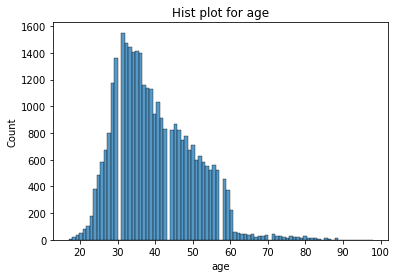

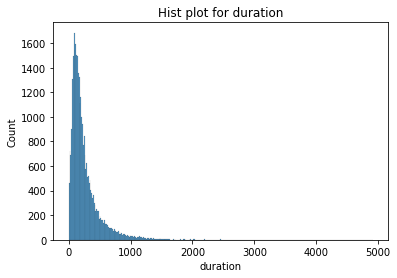

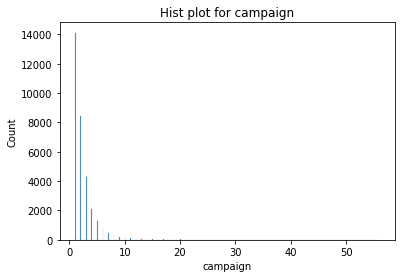

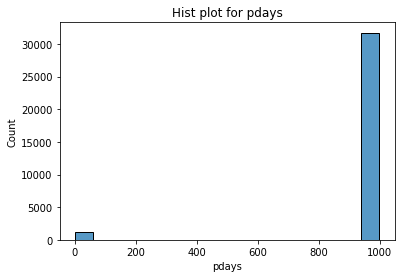

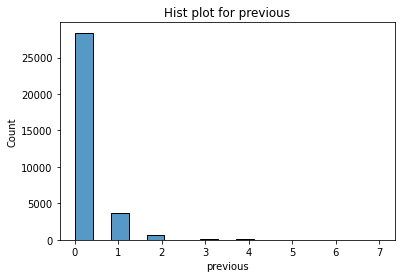

--------------------------------------------------


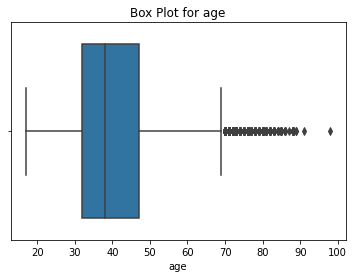

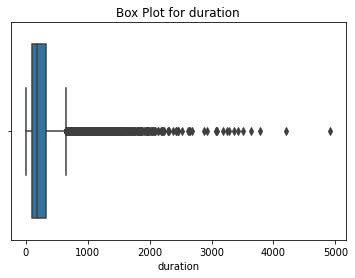

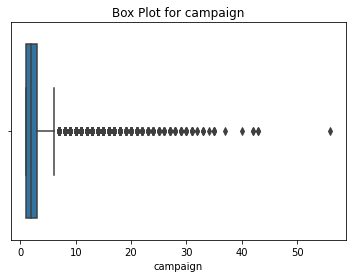

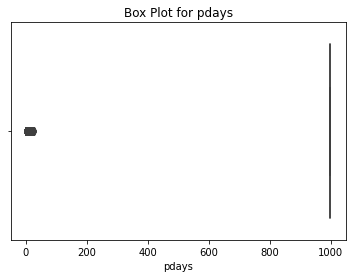

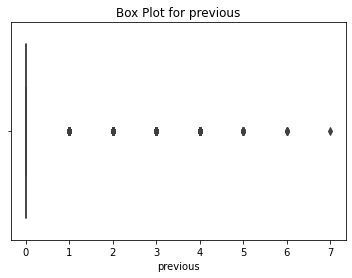

--------------------------------------------------


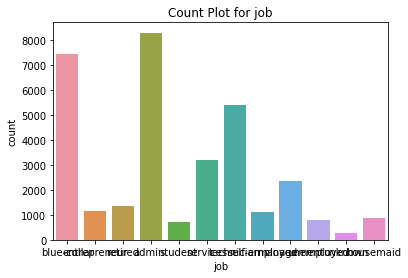

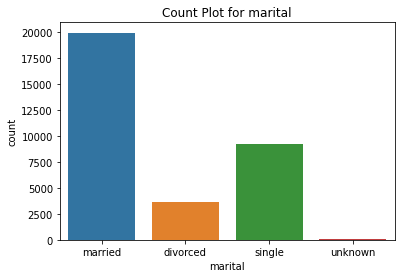

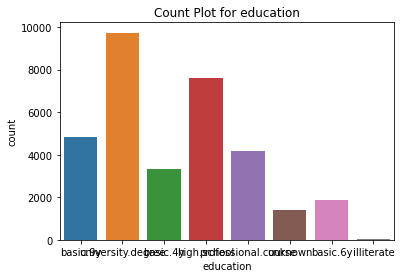

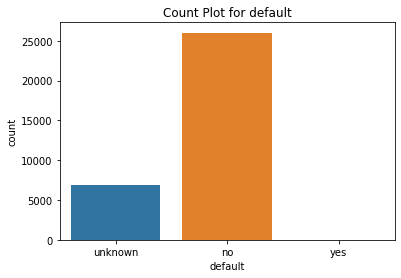

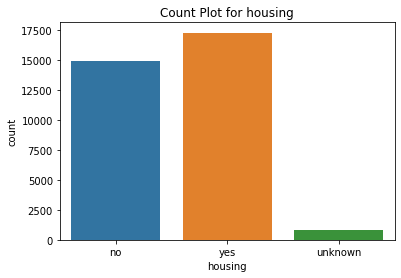

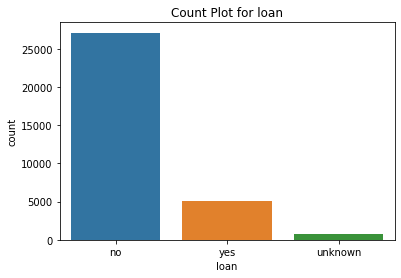

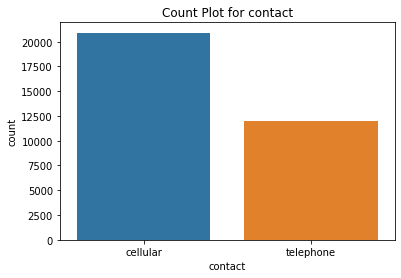

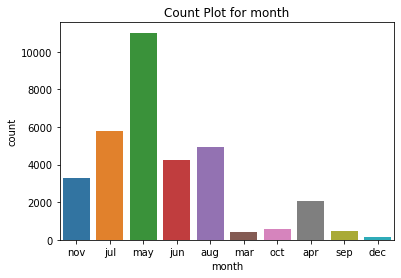

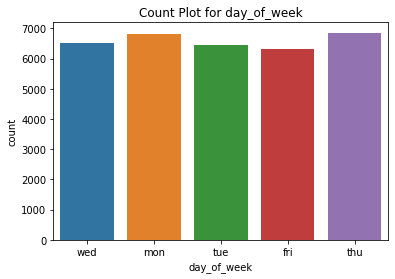

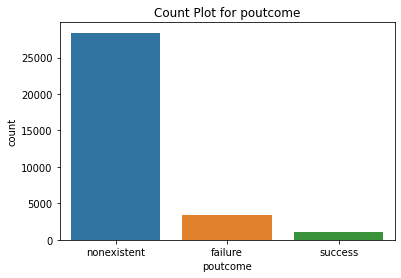

------------------------------


<AxesSubplot:xlabel='y', ylabel='count'>

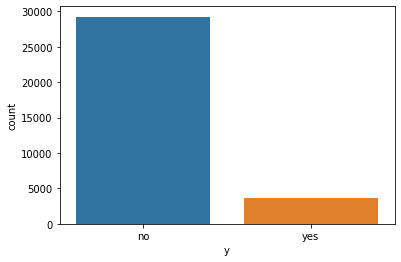

In [ ]:
for col in numerical_columns:
    sns.histplot(data=df,x=col)
    plt.title(f"Hist plot for {col}")
    plt.show()

print('-'*50)

for col in numerical_columns:
    sns.boxplot(data=df,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

for col in categorical_columns:
    sns.countplot(data=df,x=col)
    plt.title(f"Count Plot for {col}")
    plt.show()

print('-'*30)

sns.countplot(x=df['y'])


In [ ]:
X = df.drop(columns=['y'])
y = df['y']

In [ ]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent


In [ ]:
y.head()

0     no
1     no
2    yes
3     no
4     no
Name: y, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

t = LabelEncoder()

y = t.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
 

In [ ]:
X_train.shape

(26353, 15)

In [ ]:
X_test.shape

(6589, 15)

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
19895,53,admin.,married,university.degree,unknown,no,no,cellular,may,wed,160,7,999,1,failure
2376,46,services,married,basic.9y,unknown,yes,no,cellular,aug,wed,226,4,999,0,nonexistent
14120,33,admin.,single,professional.course,no,yes,no,cellular,jul,wed,520,2,999,0,nonexistent
5441,45,services,married,high.school,unknown,yes,no,telephone,may,wed,206,2,999,0,nonexistent
1133,32,admin.,married,high.school,no,yes,no,cellular,jul,thu,434,2,999,0,nonexistent


## Feature Selection

<AxesSubplot:>

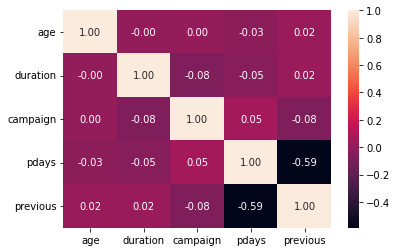

In [ ]:
corr = df.corr()

sns.heatmap(corr,annot=True,fmt='.2f')

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# For Numerical Values

numerical_features = {}
for col in numerical_columns:
    group0 = X_train[y_train == 1][col]
    group1 = X_train[y_train == 0] [col]
    t_stat,p_val = ttest_ind(group0,group1)

    if p_val < 0.05:
        numerical_features[col] = {
            't_statistic': t_stat,
            'p_val': p_val
        }
    print(f"{col}:t-stat={t_stat:.3f},p_val={p_val:.3f}")

numerical_features.keys()

age:t-stat=4.761,p_val=0.000
duration:t-stat=69.676,p_val=0.000
campaign:t-stat=-11.087,p_val=0.000
pdays:t-stat=-56.437,p_val=0.000
previous:t-stat=38.340,p_val=0.000


dict_keys(['age', 'duration', 'campaign', 'pdays', 'previous'])

In [ ]:
from scipy.stats import chi2_contingency

categorical_significant = {}

for col in categorical_columns:
    contengency_table = pd.crosstab(X_train[col],y_train)

    chi2_stat,p_val,dof,expected = chi2_contingency(contengency_table)

    if p_val < 0.05:
        categorical_significant[col] = p_val

    print(f"{col}: chi-test={chi2_stat:.3f},p_val={p_val:.3f}")    

categorical_significant.keys()

# len(categorical_significant)




job: chi-test=613.963,p_val=0.000
marital: chi-test=78.828,p_val=0.000
education: chi-test=137.823,p_val=0.000
default: chi-test=265.325,p_val=0.000
housing: chi-test=2.162,p_val=0.339
loan: chi-test=0.221,p_val=0.896
contact: chi-test=551.609,p_val=0.000
month: chi-test=2165.708,p_val=0.000
day_of_week: chi-test=9.634,p_val=0.047
poutcome: chi-test=2727.555,p_val=0.000


dict_keys(['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome'])

In [ ]:
updated_categorical = ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome',]
updated_numerical = ['age', 'duration', 'campaign', 'pdays', 'previous']

X_train = X_train[updated_categorical+updated_numerical]
X_test = X_test[updated_categorical+updated_numerical]


In [ ]:
X_train.shape

(26353, 13)

In [ ]:
X_test.shape

(6589, 13)

In [ ]:
X_train.head()

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous
19895,admin.,married,university.degree,unknown,cellular,may,wed,failure,53,160,7,999,1
2376,services,married,basic.9y,unknown,cellular,aug,wed,nonexistent,46,226,4,999,0
14120,admin.,single,professional.course,no,cellular,jul,wed,nonexistent,33,520,2,999,0
5441,services,married,high.school,unknown,telephone,may,wed,nonexistent,45,206,2,999,0
1133,admin.,married,high.school,no,cellular,jul,thu,nonexistent,32,434,2,999,0


In [ ]:
num_pipeline = Pipeline([
    ('num_imputer',SimpleImputer(strategy='median')),
    ('robust_imputer',RobustScaler()),
    ('scalar',StandardScaler())

])


cat_pipeline = Pipeline([
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('one_hot',OneHotEncoder(drop='first',sparse=False))
])

In [ ]:
preprocess_col = ColumnTransformer([
    ('num_pipe',num_pipeline,updated_numerical),
    ('cat_pipe',cat_pipeline,updated_categorical),
    

])

In [ ]:
# preprocess_pipeline = Pipeline([
#     ('col_preprcess',preprocess_col)
# ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


algorithms = {
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'adb': AdaBoostClassifier(),
    'gdb': GradientBoostingClassifier(),
    'xgb' : xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),
    'lg': LogisticRegression(class_weight='balanced',max_iter=1000),
    'svm': SVC()
}

significat_pipeline = {}
results = {}


for name,algo in algorithms.items():
    # pipeline = Pipeline([
    #     ('pipeline',preprocess_pipeline),
    #     ('algo',algo)
    # ])

    pipeline = ImbPipeline([
        ('pipeline',preprocess_col),
        ('smote',SMOTE(sampling_strategy=0.5,random_state=42)),
        ('algo',algo)
    ])

    pipeline.fit(X_train,y_train)

    joblib.dump(pipeline,f"{name}.pkl")
    significat_pipeline[name] = pipeline

    

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    cf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='accuracy')
    cv_mean = cv_score.mean()

    print(f"{name}")
    print(f"Accuracy:{accuracy}")
    print(f"clf:\n{clf_report}")
    print(f"cf_matrix:\n{cf_matrix}")
    print(f"cv score:{cv_score}")
    print(f"cv mean:{cv_mean}")
    print('-'*50)



random_forest
Accuracy:0.8999848231901654
clf:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5815
           1       0.59      0.49      0.54       774

    accuracy                           0.90      6589
   macro avg       0.76      0.72      0.74      6589
weighted avg       0.89      0.90      0.90      6589

cf_matrix:
[[5549  266]
 [ 393  381]]
cv score:[0.90267501 0.89888067 0.90741795 0.90531309 0.90474383]
cv mean:0.9038061110577118
--------------------------------------------------
decision_tree
Accuracy:0.869024131127637
clf:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5815
           1       0.45      0.47      0.46       774

    accuracy                           0.87      6589
   macro avg       0.69      0.70      0.69      6589
weighted avg       0.87      0.87      0.87      6589

cf_matrix:
[[5364  451]
 [ 412  362]]
cv score:[0.86700816 0.86378296 0